# 内容提要
### 1.类和对象基本语法
### 2.关于变量和属性
### 3.各种方法 （实例方法，类方法，静态方法）
### 4.类和方法的注释文档
------

## 1.类和对象基本语法

In [1]:
#定义函数
def func():
    pass

#定义类
class MyCls:
    pass

#实例化一个对象
a = MyCls()

#类名字符串
print(MyCls.__name__) 
# print(a.__name__)   # 对象里没有这个属性
print(a.__class__)    # 这样指向原来的类
print(a.__class__.__name__)   # 然后获得类名

#类也可以赋值，MyCls其实是一个变量
b = MyCls
print(b.__name__) 

MyCls
<class '__main__.MyCls'>
MyCls
MyCls


## 2.关于变量和属性

In [2]:
num = 5  # 内存中开辟一个地方放5，并把索引给num

#### 属性分为类属性和对象属性两种，接下来讲对象属性  
 
 1. 增加属性  
    a. 直接加：对象.属性 = 值  
      &emsp;&emsp;这种方法先在内存中创建对象，再将引用赋给属性。  
    b. 构造函数__ init __方法
    
    
 2. 修改属性  
    1）原地修改
    2）在内存中创建对象，再将引用赋给属性，原来的回收掉  
 
 
 3. 删除属性  
    删除变量：del var  
    删除属性：del ob.attr  
    (如果该对象没有其它的引用，就被回收了)
 

In [17]:
#关于对象属性

# 增加属性
obj = MyCls()
obj.attr1 = 1
obj.attr2 = ["a","b"]
print(obj.__dict__)  # 把对象属性都放__dict__字典里


#属性的修改
print("obj.attr1 ", id(obj.attr1))
obj.attr1 = 2                        #内存中新创建一个“2”，原来的被回收，id有改变
print("obj.attr1 ", id(obj.attr1)) 

print("obj.attr2 ", id(obj.attr2))
obj.attr2.append("c")                #原地修改：操作的仍是原来的列表，id没有变化
print("obj.attr2 ", id(obj.attr2))
obj.attr2 = ["a","b"]                #新创建了一个列表，id有变化
print("obj.attr2 ", id(obj.attr2))

#删除属性
del obj.attr2

{'attr1': 1, 'attr2': ['a', 'b']}
20
obj.attr1  4423232288
obj.attr1  4423231712
obj.attr2  4494381312
obj.attr2  4494381312
obj.attr2  4494492160


#### 接下来讲类属性

类也是一个对象, 增加、修改和删除属性和上述类似

1. 增加属性  
    a. 直接加：类名.属性 = 值  
    b. 直接在类里面写
    
    
 2. 对象属性的查找  
    先找对象自身的属性，没有就去找类的属性

In [19]:
# 关于类属性


# 增加属性
class MyCls1:
    attr2 = 5                  #方式二：常用这种

MyCls1.attr1 = 1               #方式一：

a = MyCls1()
print(a.attr1,"--",id(a.attr1))
print(MyCls1.attr1,"--",id(MyCls1.attr1))
print(MyCls1.__dict__)

b = MyCls1()
b.attr1 = 2                      #对象b建立了名为attr1的属性
print(b.attr1,"--",id(b.attr1))  #2     
print(a.attr1,"--",id(a.attr1))  #1
print(b.__class__.attr1,"--",id(b.__class__.attr1), "uu")  #1
print(MyCls1.attr1,"--",id(MyCls1.attr1)) #1


1 -- 4423231680
1 -- 4423231680
{'__module__': '__main__', 'attr2': 5, '__dict__': <attribute '__dict__' of 'MyCls1' objects>, '__weakref__': <attribute '__weakref__' of 'MyCls1' objects>, '__doc__': None, 'attr1': 1}
2 -- 4423231712
1 -- 4423231680
1 -- 4423231680 uu
1 -- 4423231680


In [25]:
# 类属性和对象属性

class MyCls3:
    attr2 = 5 

ob = MyCls3()
ob.attr2 += 6                     #并不是在原位上修改的，而是新创建了对象属性

print("ob", ob.attr2,"--", id(ob.attr2))
print("MyCls3", MyCls3.attr2,"--", id(MyCls3.attr2))

ob 11 -- 4423232000
MyCls3 5 -- 4423231808


#### 关于__ dict __  

对象的属性都包含在__ dict __里，并且该字典是只读的  
类的属性也一样，类的__ dict __还包含些别的，且该字典可写

In [23]:
class MyCls2:
    attr1 = 5   

c = MyCls1()
c.__dict__ = {"a1":"a","b1":"b"}          #可以这样添加属性
print(c.b1)         
c.__dict__["a1"] = 8                      #对象的__dict__ 可写
print(c.__dict__)

print(MyCls2.__dict__)

# MyCls2.__dict__["attr1"] = 8            #'mappingproxy' object does not support item assignment

b
{'a1': 8, 'b1': 'b'}
{'__module__': '__main__', 'attr1': 5, '__dict__': <attribute '__dict__' of 'MyCls2' objects>, '__weakref__': <attribute '__weakref__' of 'MyCls2' objects>, '__doc__': None}


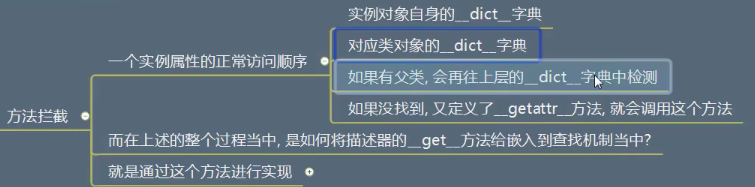

#### 关于__ slots __

用来限制某个类能添加的对象属性

In [34]:
class MyCls4:
    __slots__ = ["a","b"]
    
ob1 = MyCls4()
ob1.b = 5
# ob1.c = 5                         # 'MyCls4' object has no attribute 'c'
print(MyCls4.__dict__)
print(ob1.__slots__)
#print(ob1.__dict__)                # 'MyCls4' object has no attribute '__dict__'

{'__module__': '__main__', '__slots__': ['a', 'b'], 'a': <member 'a' of 'MyCls4' objects>, 'b': <member 'b' of 'MyCls4' objects>, '__doc__': None}
['a', 'b']


In [30]:
class MyCls4:
    pass
    
ob1 = MyCls4()
ob1.b = 5
# ob1.c = 5         # 'MyCls4' object has no attribute 'c'
print(MyCls4.__dict__)

{'__module__': '__main__', '__dict__': <attribute '__dict__' of 'MyCls4' objects>, '__weakref__': <attribute '__weakref__' of 'MyCls4' objects>, '__doc__': None}


## 3.各种方法 （实例方法，类方法，静态方法）

#### 1. 方法的第一个参数必须是要接收的数据类型
- 实例方法：默认第一个参数接收实例
- 类犯法：默认第一个参数接收类，如果是继承类调用，那么传入的是derived的
- 静态方法：默认第一个参数啥也不接收

#### 2.方法只能存储在类对象里面，而不是实例对象里面，且是存在__ dict __里

In [44]:
class MyCls5:
    def func1(self):
        print("实例方法", self)
        
    @classmethod
    def func2(cls):
        print("类方法", cls)
        
    @staticmethod
    def func3():
        print("静态方法")

ob = MyCls5()

# MyCls5.func1()          # func1() missing 1 required positional argument: 'self'
MyCls5.func1(ob)          # 这样就ok了
ob.func1()


MyCls5.func2()
ob.func2()

MyCls5.func3()
ob.func3()

print(MyCls5.__dict__)    #方法都在类对象中，方法也是对象
print(ob.__dict__)

实例方法 <__main__.MyCls5 object at 0x10c48fd60>
实例方法 <__main__.MyCls5 object at 0x10c48fd60>
类方法 <class '__main__.MyCls5'>
类方法 <class '__main__.MyCls5'>
静态方法
静态方法
{'__module__': '__main__', 'func1': <function MyCls5.func1 at 0x10c0e8430>, 'func2': <classmethod object at 0x10c48f6d0>, 'func3': <staticmethod object at 0x10c48f910>, '__dict__': <attribute '__dict__' of 'MyCls5' objects>, '__weakref__': <attribute '__weakref__' of 'MyCls5' objects>, '__doc__': None}
{}


### 元类

类对象的模板，就是type。内置类型的也由type来
type() 方法也可以生成一个类对象  
也可以创建别的元类，类中写上 __ metaclass __= xxx (或者放模块中，模块级别)

类的创建：选哪个元类？从本类中找__ metaclass __， 不行去父类找，再不行去模块找，都没有用type

In [47]:
print(MyCls5.__class__)

print(MyCls5.__dict__)

<class 'type'>
{'__module__': '__main__', 'func1': <function MyCls5.func1 at 0x10c0e8430>, 'func2': <classmethod object at 0x10c48f6d0>, 'func3': <staticmethod object at 0x10c48f910>, '__dict__': <attribute '__dict__' of 'MyCls5' objects>, '__weakref__': <attribute '__weakref__' of 'MyCls5' objects>, '__doc__': None}


## 4.类和方法的注释文档

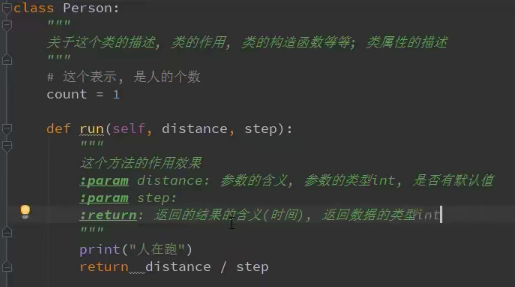

### pydoc来查看注释文档

| 命令 | 说明 |
| :-----| :---- |
| python3 -m pydoc -h | 查看pydoc的帮助选项 |
| python3 -m pydoc -p 端口号 | 网页等形式打开注释文档，也可以直接 -b |
| python3 -m pydoc -w 模块名 | 注释文件生成html文档 |


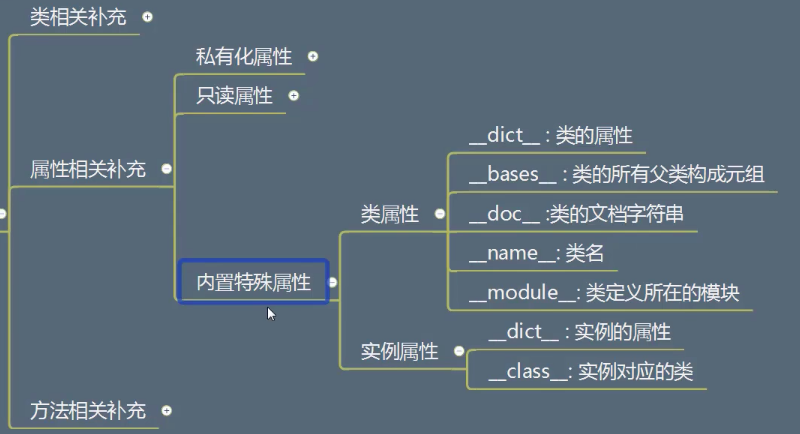